<a href="https://colab.research.google.com/github/erickcori/modelamiento/blob/main/tarea_1_modelamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files

# Subir el archivo
uploaded = files.upload()
fname = list(uploaded.keys())[0]

# Leer desde A8 hasta D656
df = pd.read_excel(
    fname,
    usecols="A:D",     # solo columnas A-D
    skiprows=7,        # saltar las 7 primeras filas (A1:A7) y empezar en A8
    nrows=649          # número de filas de datos (656 - 7)
)

# Renombrar columnas
df.columns = ["date", "hour", "o3", "temp"]

# Convertir tipos
df["o3"] = pd.to_numeric(df["o3"], errors="coerce")
df["temp"] = pd.to_numeric(df["temp"], errors="coerce")

# Crear columna timestamp (opcional)
df["timestamp"] = pd.to_datetime(df["date"].astype(str) + " " + df["hour"].astype(str),
                                 dayfirst=True, errors="coerce")

df.head()

Saving RibPreto_Out2019.xls to RibPreto_Out2019.xls


,date,hour,o3,temp,timestamp
0,05/10/2019,01:00,21,22.1,2019-10-05 01:00:00
1,05/10/2019,02:00,23,21.0,2019-10-05 02:00:00
2,05/10/2019,03:00,28,20.2,2019-10-05 03:00:00
3,05/10/2019,04:00,30,19.6,2019-10-05 04:00:00
4,05/10/2019,05:00,20,19.2,2019-10-05 05:00:00


In [2]:
df.drop(columns=["timestamp"], errors="ignore", inplace=True)
df.head()


,date,hour,o3,temp
0,05/10/2019,01:00,21,22.1
1,05/10/2019,02:00,23,21.0
2,05/10/2019,03:00,28,20.2
3,05/10/2019,04:00,30,19.6
4,05/10/2019,05:00,20,19.2


In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

# df ya leído como mostraste: columnas ['date','hour','o3','temp']
# Asegura tipos numéricos
df["o3"] = pd.to_numeric(df["o3"], errors="coerce")
df["temp"] = pd.to_numeric(df["temp"], errors="coerce")

# Serie temporal SOLO para graficar (no la guardamos en df)
ts = pd.to_datetime(df["date"].astype(str)+" "+df["hour"].astype(str),
                    dayfirst=True, errors="coerce")

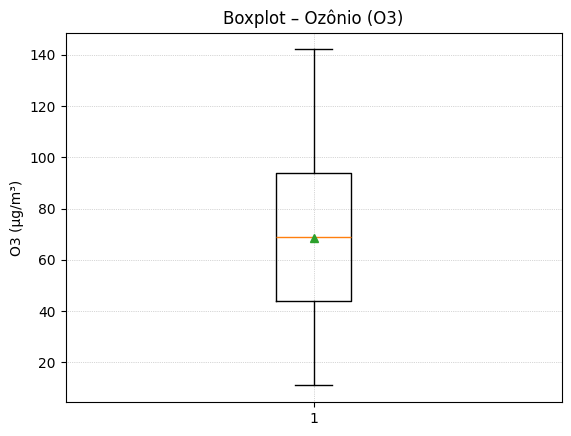

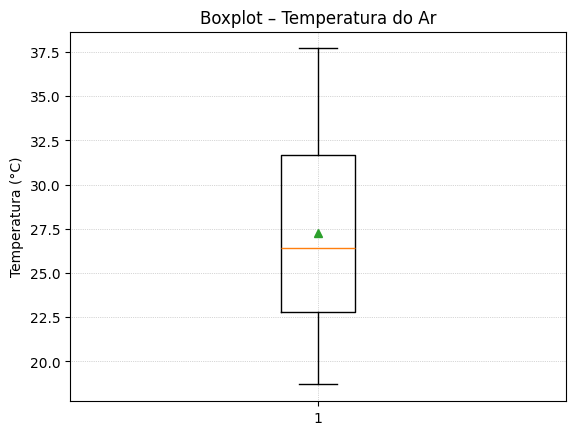

In [4]:
def boxplot_1var(s, titulo, ylabel):
    s = s.dropna()
    plt.figure()
    plt.boxplot(s, vert=True, showmeans=True)
    plt.title(titulo)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle=":", linewidth=0.5)
    plt.show()

boxplot_1var(df["o3"],  "Boxplot – Ozônio (O3)", "O3 (µg/m³)")
boxplot_1var(df["temp"], "Boxplot – Temperatura do Ar", "Temperatura (°C)")

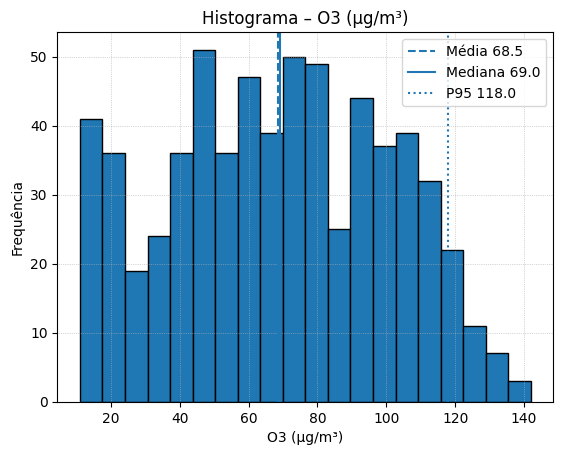

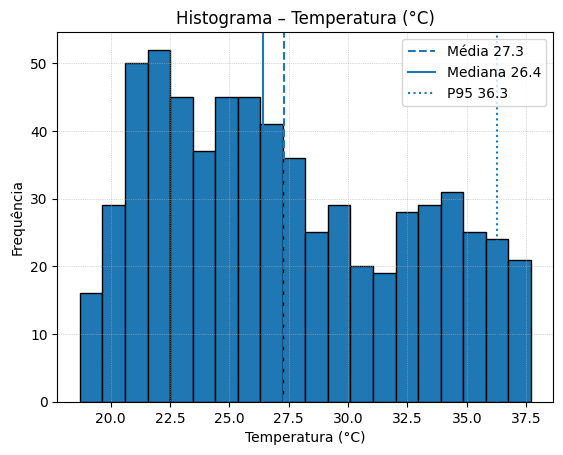

In [5]:
def hist_con_marcas(s, label):
    s = s.dropna()
    mean, med, p95 = s.mean(), s.median(), s.quantile(0.95)
    plt.figure()
    plt.hist(s, bins=20, edgecolor="black")
    plt.axvline(mean, linestyle="--", label=f"Média {mean:.1f}")
    plt.axvline(med, linestyle="-",  label=f"Mediana {med:.1f}")
    plt.axvline(p95, linestyle=":",  label=f"P95 {p95:.1f}")
    plt.title(f"Histograma – {label}")
    plt.xlabel(label); plt.ylabel("Frequência")
    plt.legend(); plt.grid(True, linestyle=":", linewidth=0.5)
    plt.show()

hist_con_marcas(df["o3"],  "O3 (µg/m³)")
hist_con_marcas(df["temp"], "Temperatura (°C)")

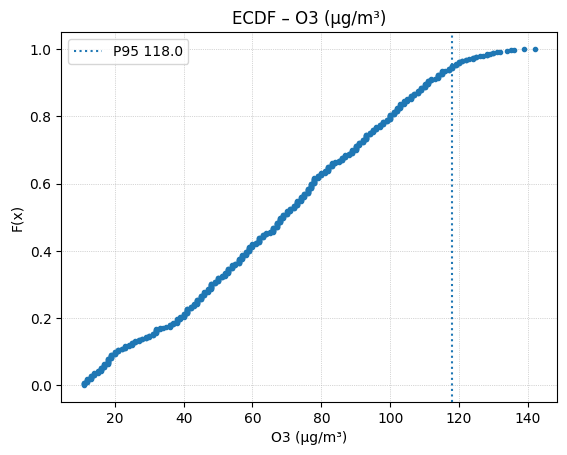

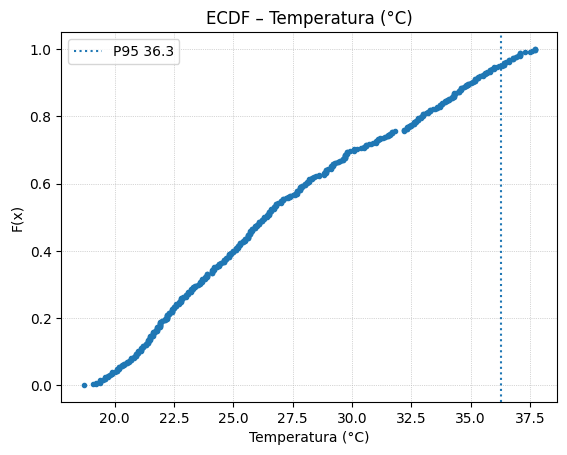

In [6]:
def ecdf_con_p95(s, label):
    s = s.dropna().sort_values()
    y = np.arange(1, len(s)+1)/len(s)
    p95 = s.quantile(0.95)
    plt.figure()
    plt.plot(s, y, marker=".", linestyle="none")
    plt.axvline(p95, linestyle=":", label=f"P95 {p95:.1f}")
    plt.title(f"ECDF – {label}")
    plt.xlabel(label); plt.ylabel("F(x)")
    plt.legend(); plt.grid(True, linestyle=":", linewidth=0.5)
    plt.show()

ecdf_con_p95(df["o3"],  "O3 (µg/m³)")
ecdf_con_p95(df["temp"], "Temperatura (°C)")


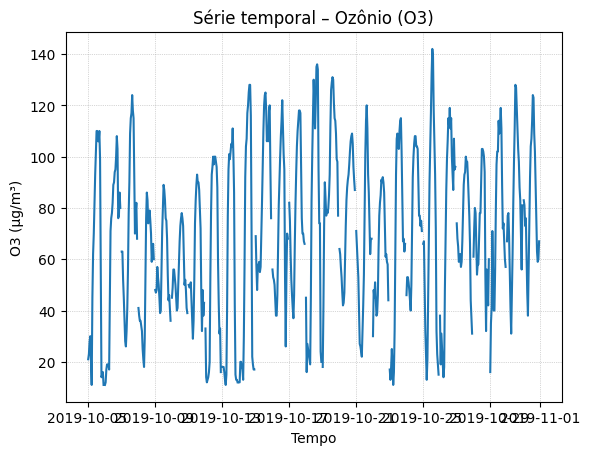

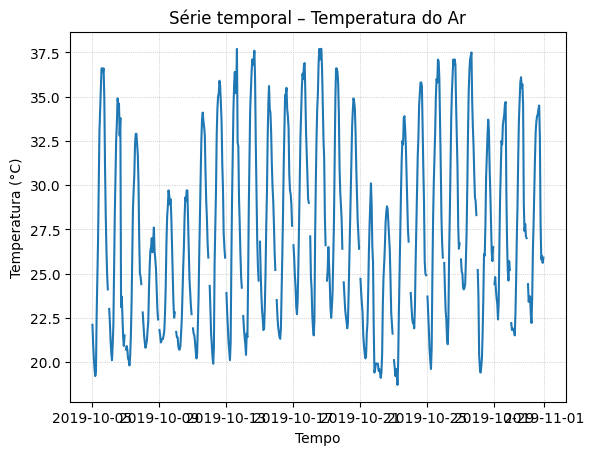

In [7]:
# O3
plt.figure()
plt.plot(ts, df["o3"])
plt.title("Série temporal – Ozônio (O3)")
plt.xlabel("Tempo"); plt.ylabel("O3 (µg/m³)")
plt.grid(True, linestyle=":", linewidth=0.5)
plt.show()

# Temperatura
plt.figure()
plt.plot(ts, df["temp"])
plt.title("Série temporal – Temperatura do Ar")
plt.xlabel("Tempo"); plt.ylabel("Temperatura (°C)")
plt.grid(True, linestyle=":", linewidth=0.5)
plt.show()

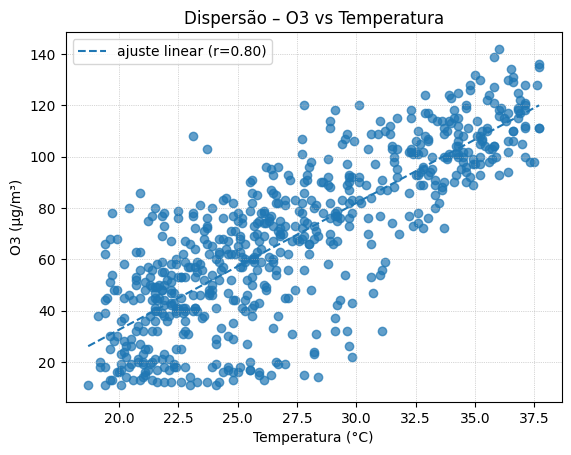

In [8]:
s = df[["o3","temp"]].dropna()
plt.figure()
plt.scatter(s["temp"], s["o3"], alpha=0.7)

# recta de ajuste simple + r
m,b = np.polyfit(s["temp"], s["o3"], 1)
xfit = np.linspace(s["temp"].min(), s["temp"].max(), 100)
plt.plot(xfit, m*xfit + b, linestyle="--",
         label=f"ajuste linear (r={s.corr().loc['temp','o3']:.2f})")

plt.title("Dispersão – O3 vs Temperatura")
plt.xlabel("Temperatura (°C)"); plt.ylabel("O3 (µg/m³)")
plt.legend(); plt.grid(True, linestyle=":", linewidth=0.5)
plt.show()

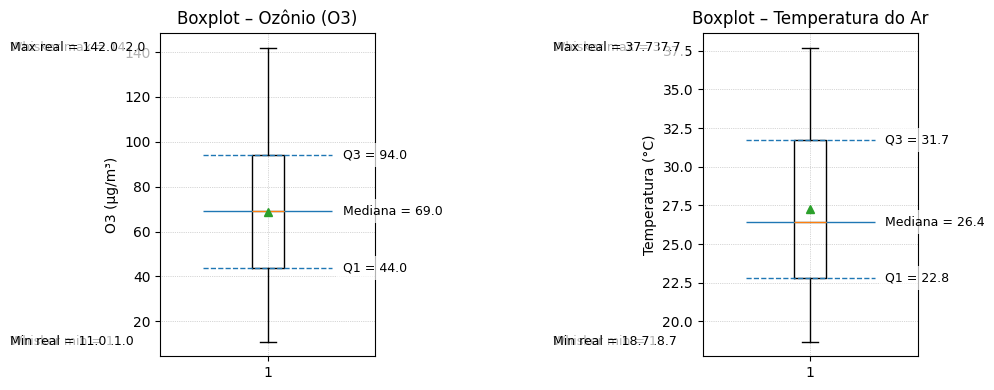

O3 (µg/m³): n=648, Q1=44.00, Mediana(Q2)=69.00, Q3=94.00, IQR=50.00, Whisker[min,max]=(11.00, 142.00), Min real=11.00, Max real=142.00, Outliers=0
Temperatura (°C): n=647, Q1=22.80, Mediana(Q2)=26.40, Q3=31.70, IQR=8.90, Whisker[min,max]=(18.70, 37.70), Min real=18.70, Max real=37.70, Outliers=0


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_box_stats(s: pd.Series):
    """Calcula Q1, Q2, Q3, IQR, whiskers (regla 1.5*IQR), min/max y outliers."""
    s = pd.to_numeric(s, errors="coerce").dropna().sort_values()
    q1 = s.quantile(0.25)
    q2 = s.quantile(0.50)  # mediana
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    # límites teóricos de Tukey
    lo = q1 - 1.5 * iqr
    hi = q3 + 1.5 * iqr
    # whiskers reales (el valor más extremo que no supera los límites)
    whisker_low  = s[s >= lo].min()
    whisker_high = s[s <= hi].max()
    # outliers son los que quedan fuera de los whiskers reales
    outliers = s[(s < whisker_low) | (s > whisker_high)]
    return {
        "n": int(s.size), "q1": q1, "q2": q2, "q3": q3, "iqr": iqr,
        "whisker_low": whisker_low, "whisker_high": whisker_high,
        "min": s.min(), "max": s.max(), "outliers": outliers
    }

def boxplot_anotado(s: pd.Series, ax, titulo, ylabel, x=1):
    s = pd.to_numeric(s, errors="coerce").dropna()
    stats = compute_box_stats(s)

    # dibujar boxplot (whis=1.5 usa regla de Tukey)
    bp = ax.boxplot(s, vert=True, positions=[x], whis=1.5, showmeans=True)

    # líneas/etiquetas
    def _txt(y, txt, dx=0.35):
        ax.text(x + dx, y, txt, va="center", fontsize=9,
                bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

    # Q1, mediana, Q3
    ax.hlines([stats["q1"], stats["q2"], stats["q3"]],
              x-0.3, x+0.3, linestyles=["--","-","--"], linewidth=1)
    _txt(stats["q1"], f"Q1 = {stats['q1']:.1f}")
    _txt(stats["q2"], f"Mediana = {stats['q2']:.1f}")
    _txt(stats["q3"], f"Q3 = {stats['q3']:.1f}")

    # whiskers (mín y máx dentro de Tukey)
    _txt(stats["whisker_low"],  f"Whisker min = {stats['whisker_low']:.1f}", dx=-1.2)
    _txt(stats["whisker_high"], f"Whisker max = {stats['whisker_high']:.1f}", dx=-1.2)

    # min/max reales (pueden coincidir con whiskers si no hay outliers)
    _txt(stats["min"],  f"Min real = {stats['min']:.1f}", dx=-1.2)
    _txt(stats["max"],  f"Max real = {stats['max']:.1f}", dx=-1.2)

    # outliers (si existen)
    if len(stats["outliers"]) > 0:
        ax.scatter(np.repeat(x, len(stats["outliers"])),
                   stats["outliers"], facecolors="none", edgecolors="C1", zorder=3)
        _txt(stats["outliers"].max(), f"Outliers: {len(stats['outliers'])}")

    ax.set_title(titulo)
    ax.set_ylabel(ylabel)
    ax.grid(True, linestyle=":", linewidth=0.5)
    return stats

# --- Ejecutar para tus dos variables ---
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

st_o3   = boxplot_anotado(df["o3"],   axes[0], "Boxplot – Ozônio (O3)", "O3 (µg/m³)")
st_temp = boxplot_anotado(df["temp"], axes[1], "Boxplot – Temperatura do Ar", "Temperatura (°C)")

plt.tight_layout()
plt.show()

# Imprimir resumen exacto en consola (para el informe)
def resumen(stats, nombre):
    print(f"{nombre}: n={stats['n']}, "
          f"Q1={stats['q1']:.2f}, Mediana(Q2)={stats['q2']:.2f}, Q3={stats['q3']:.2f}, "
          f"IQR={stats['iqr']:.2f}, Whisker[min,max]=({stats['whisker_low']:.2f}, {stats['whisker_high']:.2f}), "
          f"Min real={stats['min']:.2f}, Max real={stats['max']:.2f}, "
          f"Outliers={len(stats['outliers'])}")

resumen(st_o3,   "O3 (µg/m³)")
resumen(st_temp, "Temperatura (°C)")